# Лабраторная работа 1

___

### ФИО:
### Группа:

___

# План

### 1) [Подготовка данных к анализу](#preparation)
### 2) [Разведочный анализ данных](#analysis)
### 3) [Простроение и выбор моделей](#pipline)
### 4) [Итоговые результаты и выводы](#results)

In [1]:
import math
import scipy
import warnings
import math as m
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
plt.rcParams['figure.figsize'] = 11, 7
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 8

___

# Подготовка данных к анализу <a name="preparation"></a>

Загрузка данных, приведение к подходящему для работы виду.

In [3]:
def load_dataset(path):
    data = pd.read_csv(path)
    ts = ((data['X_value'].values)**2 + (data['Y_value'].values)**2 + (data['Z_value'].values)**2)**.5
    ts = ts[::10] #понижаем частоту сигнала для упрощения примера
    return ts

In [4]:
ts = load_dataset('./data/walk_accelerometer.csv')

___
# Разведочный анализ данных <a name="analysis"></a>	

Все, что подходит для вашего временного ряда и вашей будущей модели.

* Проанализируйте на тренд, периодичность и шум (например, SSA);
* Проанализируйте автокорреляцию;
* ...

В примере, сегмент временного ряда и визуальная оценка применимости авторегрессионной модели по автокорреляции.

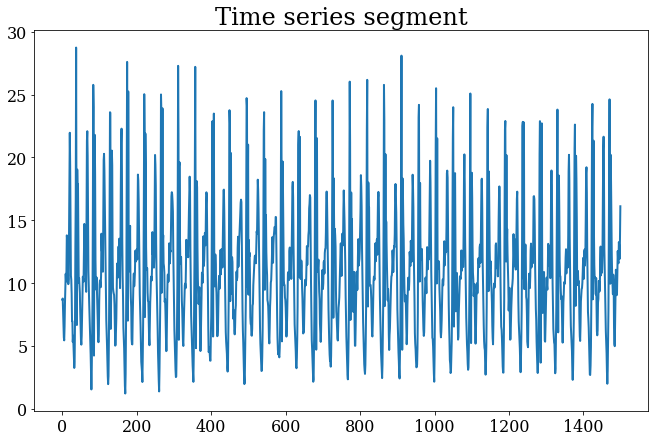

In [5]:
##########################################
plt.plot(ts[:5000])
plt.title('Time series segment')
plt.show()

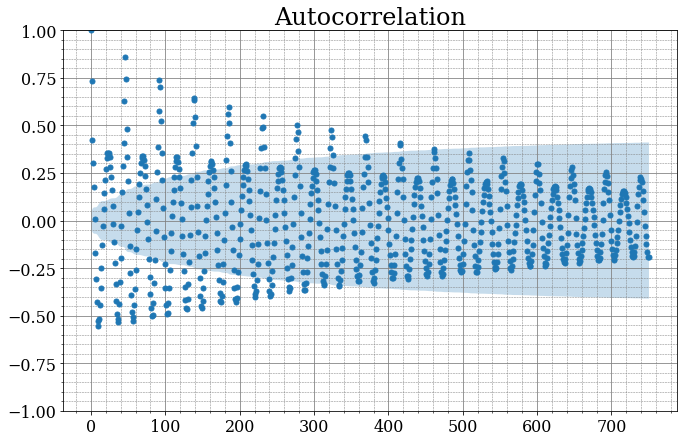

In [6]:
##########################################
plot_acf(
    ts,
    lags = int(len(ts)/2),
    use_vlines = False,
    alpha=0.1
) 
plt.tick_params(axis='both', which='major')
plt.grid(which='major',
    color = 'gray', 
    linewidth = 0.8)
plt.minorticks_on()
plt.grid(which='minor', 
    color = 'gray', 
    linestyle = '--',
    linewidth = 0.5)
plt.show()

___
# Простроение и выбор моделей <a name="pipline"></a>

 Определите вашу модель и выбранный вами подход к выбору параметров модели.
 
 Проиллюстрируйте, если это возможно.
 
 В примере выбор по минимуму MAPE на отложенной выборке.
 
 Можно также применить информационные критерии BIC, AIC, MallowCp.

In [7]:
models = []
metris_list = []

for i, n_lag in enumerate(np.arange(30,63,3)):
    models.append( AutoReg(ts[:int(len(ts)/2)], lags = n_lag).fit() )
    
    preds = models[i].predict(start=0, end=len(ts)-1, dynamic=False)
    
    metris_list.append(
        mean_absolute_percentage_error(
            ts[int(len(ts)/2):],
            preds[int(len(ts)/2):]
        )
    )

In [8]:
index_final_model = np.argmin(metris_list)
final_model = models[index_final_model]

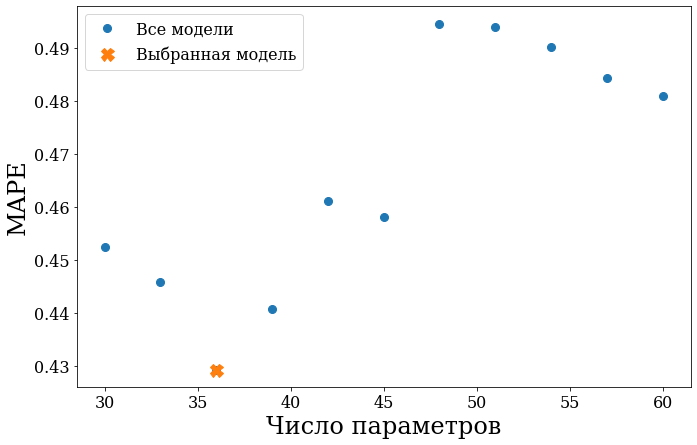

In [9]:
plt.plot(np.arange(30,63,3), metris_list, 'o', label = 'Все модели')

plt.plot(
    np.arange(30,63,3)[index_final_model],
    metris_list[index_final_model],
    'X',
    markersize=13,
    label = 'Выбранная модель'
)
plt.xlabel('Число параметров', fontsize = 24)
plt.ylabel('MAPE', fontsize = 24)
plt.legend()
plt.show()

___
# Итоговые результаты и выводы <a name="results"></a>

Продемонстрируйте работу вашей итоговой модели.

Оцените:
* наибольший возможный горизонт предсказания;
* переобучение модели;
* выбранные вами дополнительниые критерии качества;
* ...

In [10]:
preds = final_model.predict(start=0, end=len(ts)-1, dynamic=False)

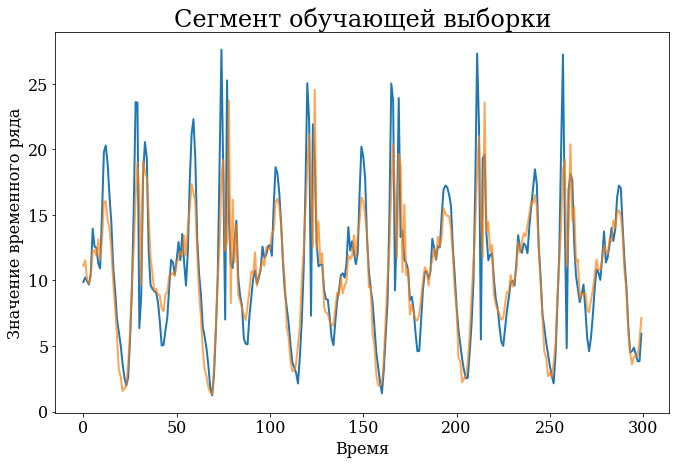

In [11]:
plt.plot(ts[100:400])
plt.plot(preds[100:400], alpha = .7)
plt.title('Сегмент обучающей выборки')
plt.ylabel('Значение временного ряда', fontsize = 16)
plt.xlabel('Время', fontsize = 16)
plt.show()

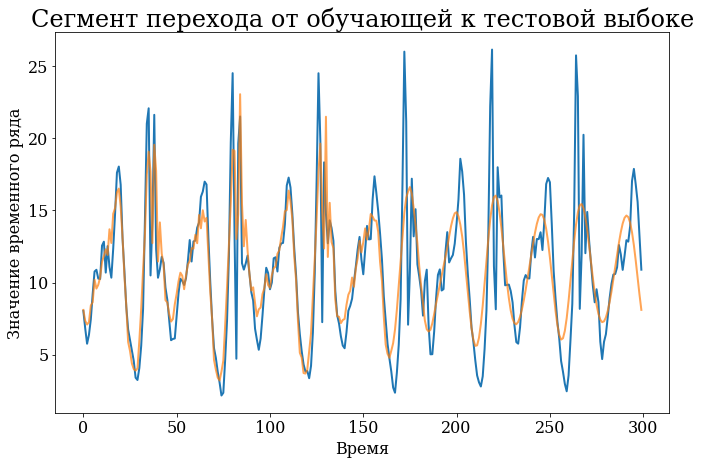

In [12]:
plt.plot(ts[600:900])
plt.plot(preds[600:900], alpha = .7)
plt.title('Сегмент перехода от обучающей к тестовой выбоке')
plt.ylabel('Значение временного ряда', fontsize = 16)
plt.xlabel('Время', fontsize = 16)
plt.show()

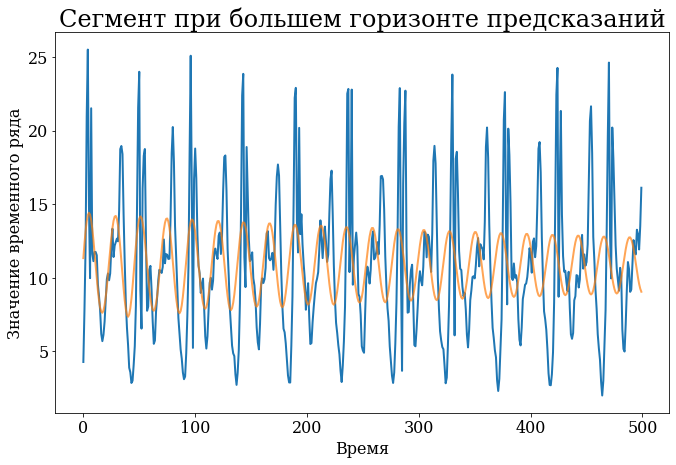

In [13]:
plt.plot(ts[1000:])
plt.plot(preds[1000:], alpha = .7)
plt.title('Сегмент при большем горизонте предсказаний')
plt.ylabel('Значение временного ряда', fontsize = 16)
plt.xlabel('Время', fontsize = 16)
plt.show()